In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Automobile_data.csv')

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
# 2. Cho biết có bao nhiêu giá trị trong cột 'price' là chuỗi số, bao nhiêu giá trị không là chuỗi số. 
df['price'].str.isnumeric().value_counts()


True     201
False      4
Name: price, dtype: int64

In [9]:
# Cho biết vị trí các dòng chứa 'price' không phải là chuỗi số.
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [10]:
df.head(11)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [12]:
#3. Thay thế những 'price' không phải là chuỗi số này bằng giá trị median của 'price'. 
#   Đổi cột 'price' sang kiểu số
# prices = df['price'].loc[df['price'] != '?']
prices = df['price'].loc[df['price'].str.isnumeric() == True]
price_median = prices.astype(float).median()
df['price'] = df['price'].replace('?', price_median).astype(float)

In [14]:
# df['price'].loc[df['price'].str.isnumeric() == False] = price_median
# df['price'] = df['price'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [16]:
#4. Thực hiện tương tự 2. và 3. cho các cột 'horsepower', normalized-losses
# WFH


In [19]:
# 5.Tìm hiểu xu hướng trung tâm của các cột 'height', 'price'
# mean, median, mode
print('Mean of height:', round(df['height'].mean(), 2))
print('Median of height:', df['height'].median())
print('Mode of height:', df['height'].mode())

Mean of height: 53.72
Median of height: 54.1
Mode of height: 0    50.8
dtype: float64


In [20]:
print('Mean of price:', round(df['price'].mean(), 2))
print('Median of price:', df['price'].median())
print('Mode of price:', df['price'].mode())

Mean of price: 13150.31
Median of price: 10295.0
Mode of price: 0    10295.0
dtype: float64


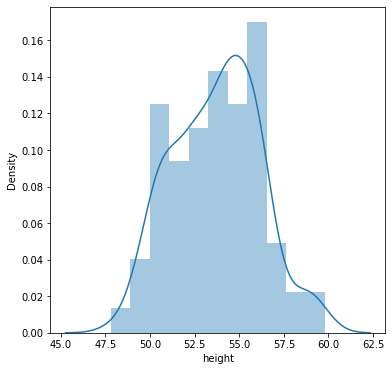

In [21]:
# 6.Trực quan hóa phân phối của các cột 'height', 'price'. Nhận xét.
plt.figure(figsize=(6,6))
sns.distplot(df['height'])
plt.show()

In [22]:
df['height'].skew()

0.06312273247192804

In [23]:
# dữ liệu của cột height: phân phối lệch phải

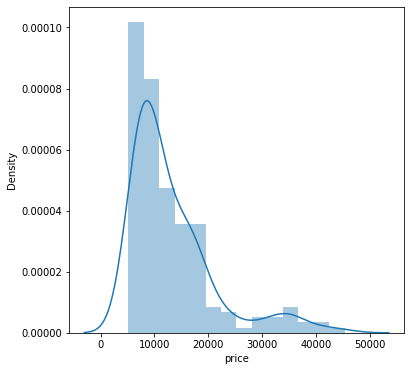

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.show()

In [25]:
# dữ liệu của cột price: phân phối lệch phải

In [26]:
df['price'].skew()

1.8409793088634683

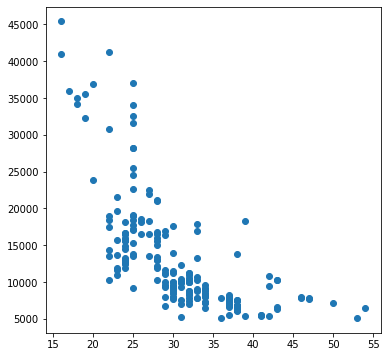

In [28]:
# 7. Trực quan hóa mối quan hệ giữa 'highway-mpg' and 'price'
plt.figure(figsize=(6,6))
plt.scatter(df['highway-mpg'], df['price'])
plt.show()

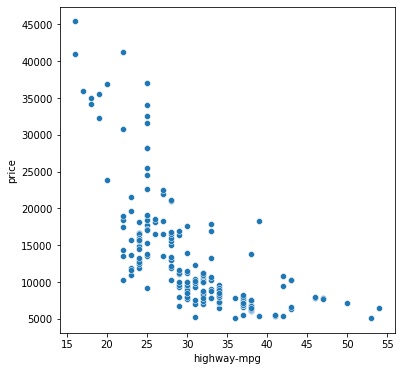

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='highway-mpg', y='price')
plt.show()

In [31]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.693037
price,-0.693037,1.000000


In [32]:
df[['height', 'price']].corr()

,height,price
height,1.000000,0.140439
price,0.140439,1.000000


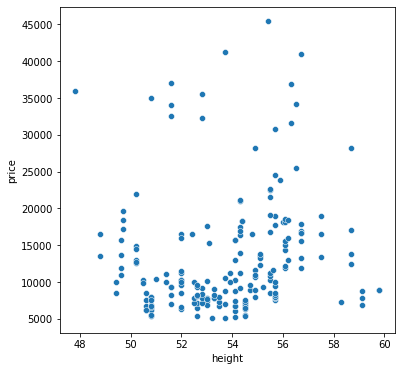

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='height', y='price')
plt.show()